# TMDB dataset
# table of content:
- introduction
- data wrangling
- data Wrangling
- Exploratory Data Analysis
- conclusion


# introduction:
first here is the link to the dataset i used: https://www.kaggle.com/tmdb/tmdb-movie-metadata


the TMDP dataset is about 

Here are the question i am going to answer:
- what are the most popular movies?
- which movie has the highest and lowest budget?
- Which movie has the most and least profit?
- what is the relationship between the features?
- which production compaties have the highest revenue and dudgets?
- what are the properties associated with the runtime feature? 


In [1]:
#importing all needed libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
# loading the dataset
df = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
#seeing the data and understang it to prepare for analysis
df.head(4)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106


In [4]:
#looking at columns' types and null vualues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [6]:
#checking for duplicates
df.duplicated().sum()

0

#initial results:
- there are many irrelevant columns need to be dropped 
- some missing values need to be taken care of
- the dataset has no duplicates
- some columns' types are incorrect 
- some rows with null values need to be dropped 
- some movies with 0 budget or revenue need to dropped  

In [7]:
# dropping irrelevant columns
df = df.drop(['homepage', 'id', 'keywords', 'original_title', 'overview', 'spoken_languages', 'tagline', 'status'], axis=1)

In [8]:
#replacing movies with 0 budget or revenue with NAN to drop them
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
#dropping null values
df.dropna(inplace=True)

In [9]:
# making sure there is no null values
df.isnull().sum()

budget                  0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [10]:
#changing the format of the release_date column into DateTime
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2009-12-10
1   2007-05-19
2   2015-10-26
3   2012-07-16
4   2012-03-07
Name: release_date, dtype: datetime64[ns]

In [11]:
# coverting the type of the runtime for easier manipulation
df['runtime'] = df["runtime"].astype(int)

In [12]:
#making sure all changes have been applyed and we're ready to start the analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3229 non-null   float64       
 1   genres                3229 non-null   object        
 2   original_language     3229 non-null   object        
 3   popularity            3229 non-null   float64       
 4   production_companies  3229 non-null   object        
 5   production_countries  3229 non-null   object        
 6   release_date          3229 non-null   datetime64[ns]
 7   revenue               3229 non-null   float64       
 8   runtime               3229 non-null   int32         
 9   title                 3229 non-null   object        
 10  vote_average          3229 non-null   float64       
 11  vote_count            3229 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(5)
memory usage

# Exploratory Data Analysis
now the dataset is ready for the analysis

# Q1:what are the most popular movies?

<Figure size 720x1440 with 0 Axes>

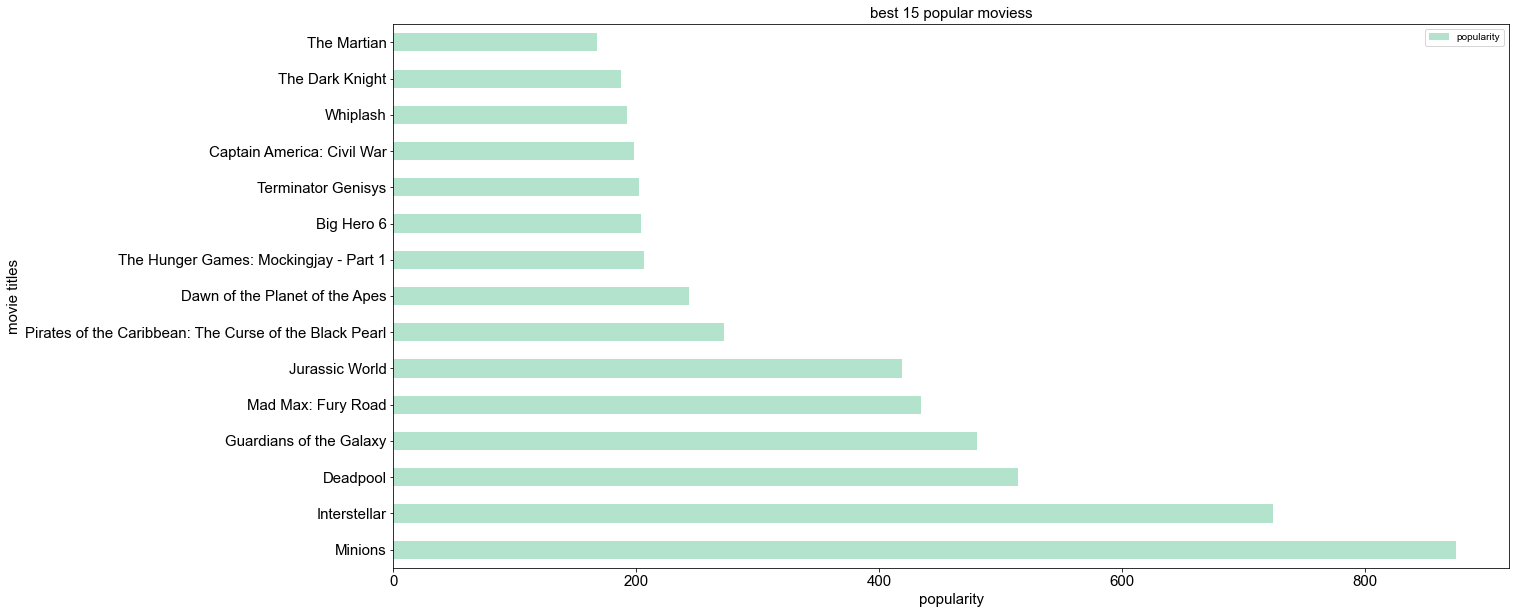

In [13]:
#getting most popular movies 
popular_movies = df[['title', 'popularity']].groupby(['title']).sum().sort_values(by=['popularity'],ascending=False).head(15)
plt.figure(figsize= [10,20])
popular_movies.plot(kind= 'barh',figsize = (20,10),fontsize=15,colormap='Pastel2')
plt.title("best 15 popular moviess",fontsize=15)
plt.xlabel('popularity',fontsize=15)
plt.ylabel("movie titles",fontsize= 15)
sns.set_style("whitegrid")

some reasons for the popularity of these movies because filmmakers who manage to leave a creative stamp on their work, the better the chances are the work will appreciate over time.


# Q2:which movie has the highest and lowest budget?

In [14]:
#finding  the movie with highest budget
highest_budget =  pd.DataFrame(df.loc[df['budget'].idxmax()])
highest_budget

,17
budget,3.8e+08
genres,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""..."
original_language,en
popularity,135.414
production_companies,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."
production_countries,"[{""iso_3166_1"": ""US"", ""name"": ""United States o..."
release_date,2011-05-14 00:00:00
revenue,1.04571e+09
runtime,136
title,Pirates of the Caribbean: On Stranger Tides


the movie: "Pirates of the Caribbean: On Stranger Tides" has the highest budget 
    and it is no surprise as it had many famous starts and the graphics were amazing

In [15]:
#finding movies with lowest budget 
lowest_budget =  pd.DataFrame(df.loc[df['budget'].idxmin()])
lowest_budget

,4238
budget,1
genres,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name..."
original_language,en
popularity,28.2765
production_companies,"[{""name"": ""United Artists"", ""id"": 60}, {""name""..."
production_countries,"[{""iso_3166_1"": ""US"", ""name"": ""United States o..."
release_date,1936-02-05 00:00:00
revenue,8.5e+06
runtime,87
title,Modern Times


the movie: "Modern Times" has the lowest budget as it was produced in 1936 and it was a silent movie so it makes sense to have a low budget

# Question 3 : Which movies have the highest and lowest profit?

In [16]:
#creating a new column for the profit
df['profit'] = df['revenue'] - df['budget']
#finding movies with highest and lowest profit 
highest_profit =  pd.DataFrame(df.loc[df['profit'].idxmax()])
lowest_profit = pd.DataFrame(df.loc[df['profit'].idxmin()])
profit = pd.concat([highest_profit, lowest_profit],axis=1)
profit

,0,13
budget,2.37e+08,2.55e+08
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
original_language,en,en
popularity,150.438,49.047
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."
production_countries,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""US"", ""name"": ""United States o..."
release_date,2009-12-10 00:00:00,2013-07-03 00:00:00
revenue,2.78797e+09,8.92899e+07
runtime,162,149
title,Avatar,The Lone Ranger


As we can see that Avatar movie has the highest profit as it is one the most popular movie because it takes the audience in an astonishing journey that you will definately enjoy 

despite of the huge budget and well known cast, the movie:"The lone roger" hasn't kicked of with lose up to 120M$ 

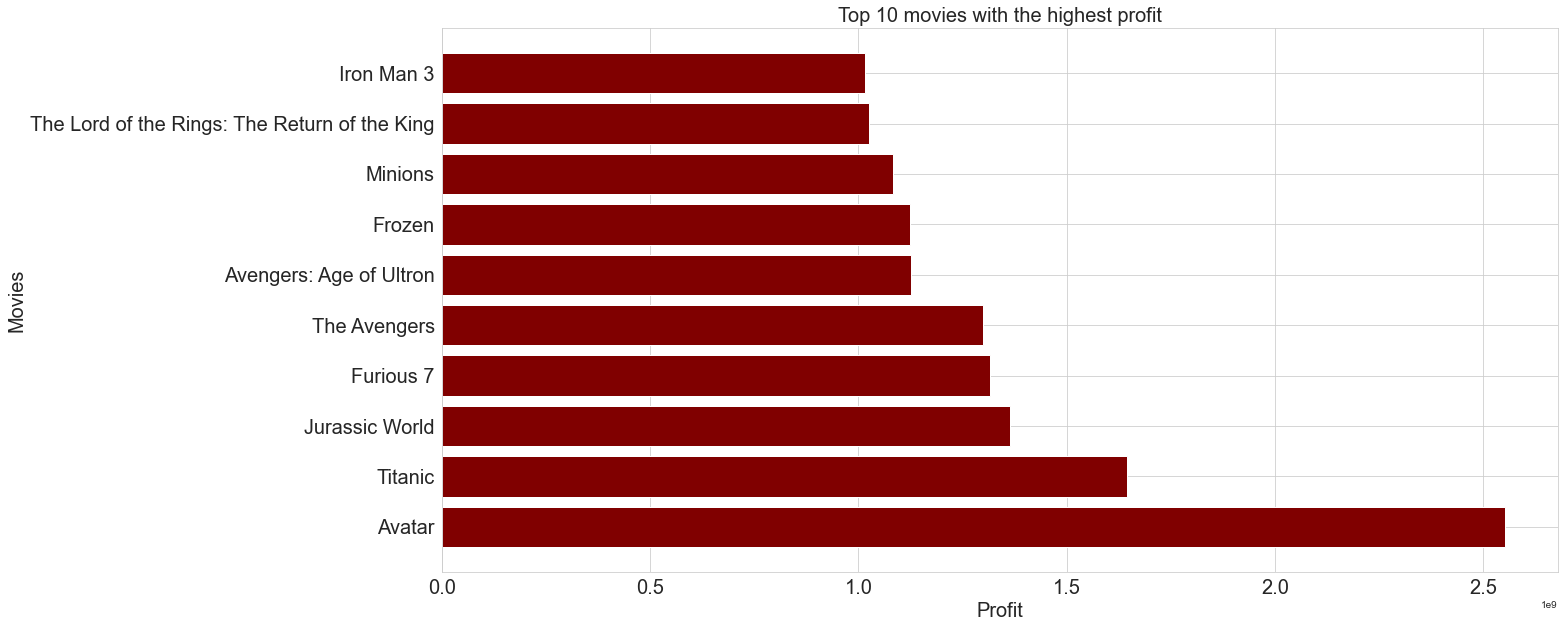

In [17]:
# creating a plot for the movies with highest profit
df_mp = pd.DataFrame(df['profit'].sort_values(ascending = False))
df_mp['title'] = df['title'].copy()
movies = df_mp['title'][:10]
profit = df_mp['profit'][:10]
fig = plt.figure(figsize = (20, 10))
plt.barh(movies, profit, color ='maroon')
plt.xlabel("Profit",size=20)
plt.xticks(size=20)
plt.ylabel("Movies",size=20)
plt.yticks(size=20)
plt.title("Top 10 movies with the highest profit",size = 20)
sns.set_style("whitegrid")

# Q4: what is the relationship between the features?

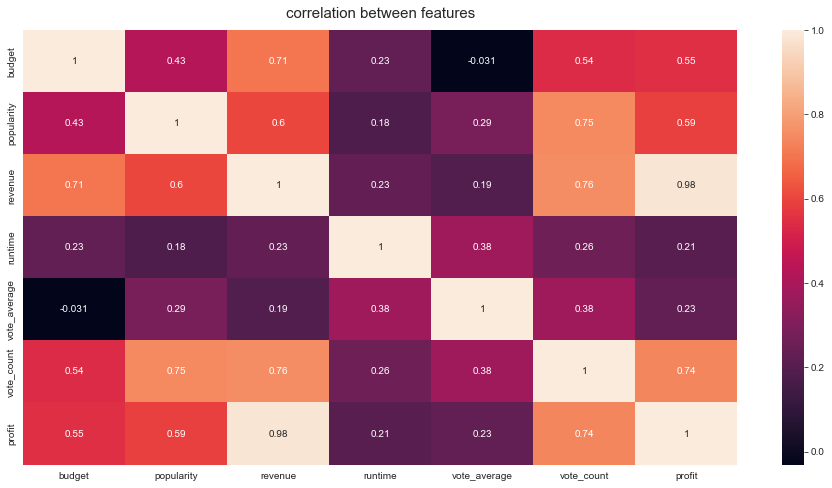

In [18]:
#creating a correlation matrix for the features
relation_matrix = df.corr()
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(relation_matrix,annot=True)
heatmap.set_title('correlation between features', fontdict={'fontsize':15}, pad=12);

Text(0.5, 0.98, 'correlation between important features')

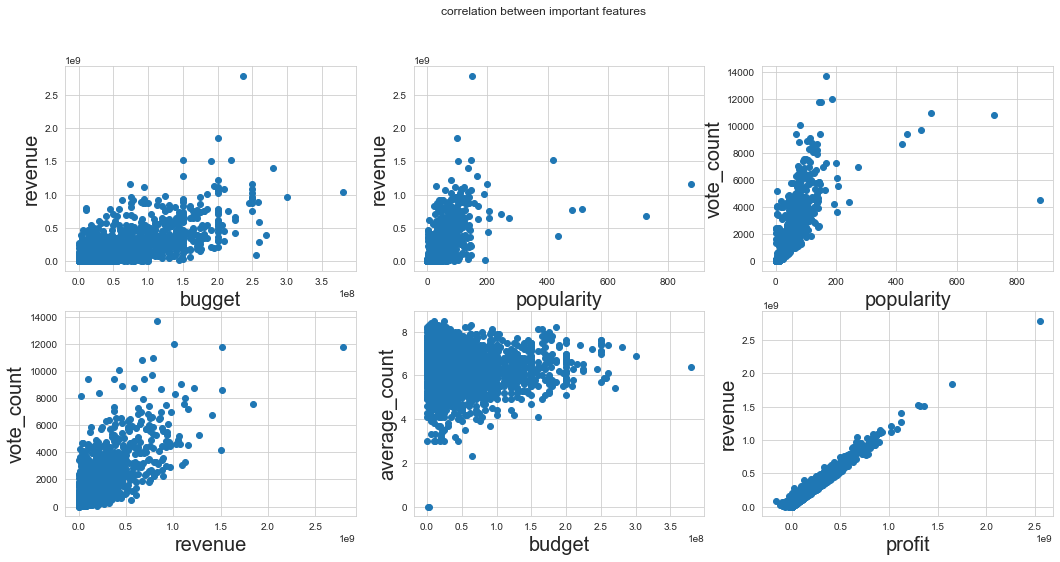

In [19]:
#ploting important relatioships for comparison
plt.figure(figsize= [17.70,8.27])
plt.subplot(2,3,1)
plt.scatter(df['budget'],df['revenue'])
plt.xlabel('bugget',fontsize = 20)
plt.ylabel('revenue',fontsize = 20)
plt.subplot(2,3,2)
plt.scatter(df['popularity'],df['revenue'])
plt.xlabel('popularity',fontsize = 20)
plt.ylabel('revenue',fontsize = 20)
plt.subplot(2,3,3)
plt.scatter(df['popularity'],df['vote_count'])
plt.xlabel('popularity',fontsize = 20)
plt.ylabel('vote_count',fontsize = 20)
plt.subplot(2,3,4)
plt.scatter(df['revenue'],df['vote_count'])
plt.xlabel('revenue',fontsize = 20)
plt.ylabel('vote_count',fontsize = 20)
plt.subplot(2,3,5)
plt.scatter(df['budget'],df['vote_average'])
plt.xlabel('budget',fontsize = 20)
plt.ylabel('average_count',fontsize = 20)
plt.subplot(2,3,6)
plt.scatter(df['profit'],df['revenue'])
plt.xlabel('profit',fontsize = 20)
plt.ylabel('revenue',fontsize = 20)
plt.suptitle("correlation between important features")

- the ralationship between budget and revenue is strong
- the relationship between popularity and revenue is also high
- the relationship between popularity and vote_count is strong
- the relationship between revenue and vote_count is strong
- there is no relationship between average_vote and budget

it makes sense that popular movies are associated with high revenue and votes 

# Q5: which production companies have high budgets and revenue?

In [20]:
#finding production companies that have highest revenue
companies_revenue = df[['production_companies', 'revenue']].groupby(['production_companies']).sum().sort_values(by=['revenue'],ascending=False).head(10)
companies_revenue

,revenue
production_companies,
"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Pixar Animation Studios"", ""id"": 3}]",6.742125e+09
"[{""name"": ""DreamWorks Animation"", ""id"": 521}]",5.678788e+09
"[{""name"": ""Marvel Studios"", ""id"": 420}]",5.123094e+09
"[{""name"": ""Paramount Pictures"", ""id"": 4}]",4.893897e+09
"[{""name"": ""Blue Sky Studios"", ""id"": 9383}, {""name"": ""Twentieth Century Fox Animation"", ""id"": 11749}]",4.185053e+09
"[{""name"": ""Columbia Pictures"", ""id"": 5}]",2.930038e+09
"[{""name"": ""Universal Pictures"", ""id"": 33}, {""name"": ""Illumination Entertainment"", ""id"": 6704}]",2.854961e+09
"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Walt Disney Animation Studios"", ""id"": 6125}]",2.799625e+09
"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]",2.787965e+09


In [21]:
#finding production companies that have highest budget
companies_budget = df[['production_companies', 'budget']].groupby(['production_companies']).sum().sort_values(by=['budget'],ascending=False).head(10)
companies_budget

,budget
production_companies,
"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Pixar Animation Studios"", ""id"": 3}]",1.732000e+09
"[{""name"": ""DreamWorks Animation"", ""id"": 521}]",1.652000e+09
"[{""name"": ""Marvel Studios"", ""id"": 420}]",1.300000e+09
"[{""name"": ""Paramount Pictures"", ""id"": 4}]",1.276186e+09
"[{""name"": ""Columbia Pictures"", ""id"": 5}]",1.073665e+09
"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",9.652800e+08
"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Walt Disney Feature Animation"", ""id"": 10217}]",9.075000e+08
"[{""name"": ""New Line Cinema"", ""id"": 12}]",8.490000e+08
"[{""name"": ""Universal Pictures"", ""id"": 33}]",8.020000e+08


seeing the relationship between revenue and budget in another way  using production companies and we can see that most successfull companies are associated with huge budgets such as: "Marvel Studios" and :Paramount Pictures"

# Q6: what are the properties associated with the runtime feature? 

In [22]:
#the longest movies
df.sort_values(by=['runtime'],ascending=False).head(5)

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,profit
2384,18000000.0,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",en,1.138383,"[{""name"": ""Egoli Tossell Film AG"", ""id"": 2254}...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2010-05-19,871279.0,338,Carlos,6.7,50,-17128721.0
1125,31115000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",en,13.244365,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1963-06-12,71000000.0,248,Cleopatra,6.7,146,39885000.0
3813,4000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",en,48.982550,"[{""name"": ""Selznick International Pictures"", ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1939-12-15,400176459.0,238,Gone with the Wind,7.7,970,396176459.0
4497,600000.0,"[{""id"": 36, ""name"": ""History""}, {""id"": 99, ""na...",en,3.409764,"[{""name"": ""Wadleigh-Maurice"", ""id"": 3816}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1970-03-26,34505110.0,225,Woodstock,7.1,66,33905110.0
1109,44000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",en,5.380124,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1980-11-19,3484331.0,219,Heaven's Gate,6.4,55,-40515669.0


movies with high runtime don't have a high popularity and most of them are quite old, they go back to the 90s

In [23]:
#the longest movie
df.sort_values(by=['runtime'],ascending=True).head()

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,profit
3626,5000000.0,"[{""id"": 99, ""name"": ""Documentary""}]",en,4.498368,"[{""name"": ""N3D Land Productions"", ""id"": 29943}...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2010-05-14,4074023.0,41,Sea Rex 3D: Journey to a Prehistoric World,5.9,11,-925977.0
3471,6000000.0,"[{""id"": 99, ""name"": ""Documentary""}]",en,0.041651,"[{""name"": ""3D Entertainment"", ""id"": 5313}, {""n...","[{""iso_3166_1"": ""BS"", ""name"": ""Bahamas""}, {""is...",2008-02-15,7518876.0,42,Dolphins and Whales: Tribes of the Ocean,8.0,3,1518876.0
1620,30000000.0,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",en,19.143721,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-04-13,14460000.0,63,Winnie the Pooh,6.8,258,-15540000.0
4673,200000.0,"[{""id"": 35, ""name"": ""Comedy""}]",en,0.622752,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1933-02-09,2200000.0,66,She Done Him Wrong,5.1,27,2000000.0
2805,12300000.0,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 12, ""...",en,28.670193,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Uni...","[{""iso_3166_1"": ""IE"", ""name"": ""Ireland""}, {""is...",1988-11-18,84460846.0,69,The Land Before Time,7.0,640,72160846.0


most of the short movies are documentary such as the movie: "Rex 3D: Journey to a Prehistoric World" has the shortest runtime with 41 minutes.


it is also abvious that these movies are popular with really low vote_count and their production compaies didn't generate any profit from them 

In [24]:
df['runtime'].mean()

110.72437287085785

Text(0.5, 1.0, 'relationship between popularity and runtime')

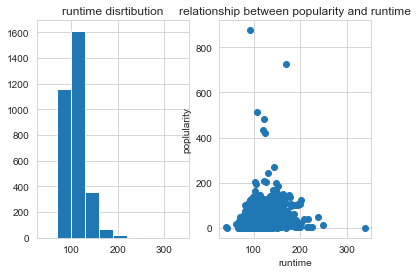

In [25]:
#ploting the runtime to see the distribution 
#and relationship between popularity and runtime
plt.subplot(1,2,1)
plt.hist(df['runtime'], bins = 10)
plt.title('runtime disrtibution')
plt.subplot(1,2,2)
plt.scatter(df['runtime'],df['popularity'])
plt.xlabel('runtime')
plt.ylabel('poplularity')
plt.title('relationship between popularity and runtime')

as we can see that the range runtime for movies is 80-150 minutes with average 110 minutes so movies below or above that range doen't have a high popularity

The longer your movie is, the harder it will be to hold the audience’s attention the entire time.

The best way to combat this is by making your viewers as invested and immersed as possible

In [26]:
# getting most frequent languages in our dataset
freq_language = df['original_language'].value_counts().head(5)
freq_language

en    3102
fr      25
es      15
ja      13
zh      13
Name: original_language, dtype: int64

(array([   2.,    9.,   19.,   26.,   44.,   70.,  161.,  323., 1146.,
        1429.]),
 array([699686., 703339., 706992., 710645., 714298., 717951., 721604.,
        725257., 728910., 732563., 736216.]),
 <a list of 10 Patch objects>)

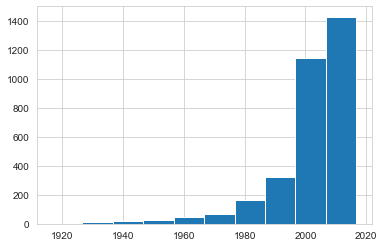

In [27]:
#seeing the most popular years
plt.hist(df['release_date'], bins = 10)

the most frequent language in this dataset is English and it is no surprise sence hollywood dominates the movie industry

# coclusion:
## to summarize my findings:
- Avatar movie has the highest profit in the world
- English movies are the most popular movies
- successful movies hve high budgets and popularity
- documentaries are popular 
- the movie can't depend on famous cast only, they should have a meaningful story and good direectors too
- the budget should be spent reasonably
- movies with high runtime arenit popular
- important relationships:
* 1-budget vs revenue
* 2-revenue vs popularity
* 3-revenue vs vote_count


every element in the movie is important from the writing to the music to the acting so filmmakers should pay attention to these element and we can wee that clear in the movie "The lone roger" the filmmakers were dependant on Johnny Depp 

whereas, Avatar had all elements for success starting from the story, cast,CGI(computer generated images) and soundtrack

# Limitations:
- the dataset had null values that had to be removed and shouldn't be filled with other values
- sthe dataset is biased to the English language, it should have variety of movies
- it is also biased to new movies
- the currency of budget and revenue wasn't clearly specified, not sure if all of them were in Dollars
- the dataset didn't have a column for directors which was an important feature in the analysis 